### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#191970;">Project 4 - Data Mining - Classification (CART,RF,ANN) - Part 2

#### <span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#708090;">Student Name - Madhu Narayanan  

#### <span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#708090;">Batch - July 2020

#### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#708090;"> Problem Statement

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. We are assigned the task to make a model which predicts the claim status and provide recommendations to management. To use CART, RF & ANN and compare the models' performances in train and test sets.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Importing required libraries for the problem statement given above.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler #for preprocessing as Standard Scaler


#for classification - Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #for model selection using train & test split
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

#for classification - Random Forest
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV #for grid search in Random forest & ANN

#for classification - ANN
from sklearn.neural_network import MLPClassifier #for Neural Network Classification

#for ROC,AUC curve,score & accuracy score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

#for creating confusion matrix in classification
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.model_selection import GridSearchCV

#for Data Encoding
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

### <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#FF0000;">2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. 

In [3]:
idm_df = pd.read_csv('insurance_part2_data-1.csv')

In [4]:
dm_df=idm_df.copy()

In [5]:
dm_df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


In [6]:
dm_df.shape

(3000, 10)

In [7]:
dm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


##### Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration)
7. Destination of the tour (Destination)
8. Amount of sales of tour insurance policies (Sales)
9. The commission received for tour insurance firm (Commission)
10. Age of insured (Age)


There are 3000 records and 10 variables (1-Target and 9-independent). 'Claimed' is the Target variable for which the problem needs to be solved in predicting 'Claimed' status using Classifier Models of CART,Random Forest & ANN and choosing the best model comparing those.

In [8]:
dm_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

There are NO missing values

#### Checking for inconsistent values

In [9]:
for feature in dm_df[['Agency_Code','Type','Claimed','Channel','Product Name','Destination']]:
    print(feature.upper(),': ', print('\n'),dm_df[feature].nunique())
    print(dm_df[feature].value_counts().sort_values())



AGENCY_CODE :  None 4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  None 2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  None 2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  None 2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  None 5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  None 3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64


There are No inconsistencies in the dataset

##### Plotting the count in Target variable (Cliamed) vs. all independent variables



No     2076
Yes     924
Name: Claimed, dtype: int64 

No     0.692
Yes    0.308
Name: Claimed, dtype: float64


<AxesSubplot:xlabel='Claimed', ylabel='count'>

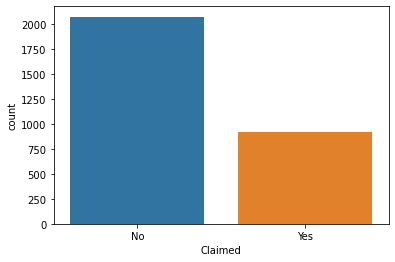

In [10]:
print(dm_df.Claimed.value_counts(),'\n')
print(dm_df.Claimed.value_counts(normalize=True))
sns.countplot(x='Claimed', data=dm_df)

In [11]:
print("Proportion of 0's ('Not Claimed')is:- ",round(dm_df.Claimed.value_counts().values[0]/dm_df.Claimed.count()*100,2),'%')
print("Proportion of 1's ('Claimed') is:- ",round(dm_df.Claimed.value_counts().values[1]/dm_df.Claimed.count()*100,2),'%')

Proportion of 0's ('Not Claimed')is:-  69.2 %
Proportion of 1's ('Claimed') is:-  30.8 %


The data is well dispersed with 70:30 ratio. Therefore the model building can be done better as there is balance in data.

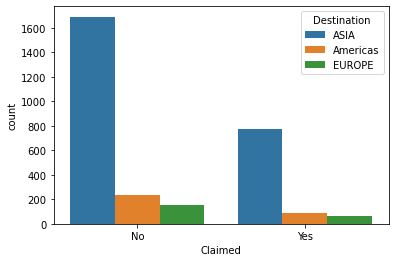

In [12]:
sns.countplot(x='Claimed',hue='Destination', data=dm_df);

Asia tops the 'Destination' follwed by Americas and Europe and the pattern is same for both Claimed as well as Not Claimed status.

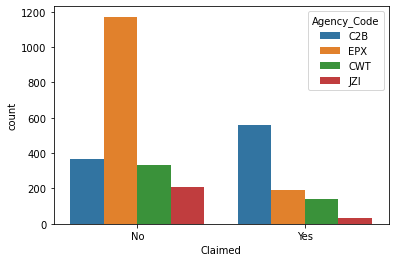

In [13]:
sns.countplot(x='Claimed',hue='Agency_Code', data=dm_df);

<b>Not Claimed Status:</b> 'EPX' channel tops the list in Not Claimed status followed by C2B,CWT,JZI.  

<b>Claimed Status:</b> However 'C2B' is the Agency that has Claimed more compared to others.

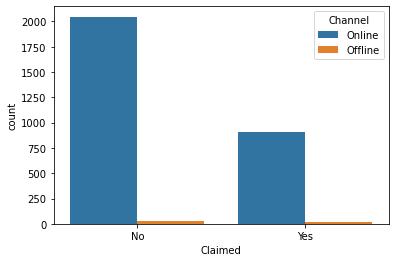

In [14]:
sns.countplot(x='Claimed',hue='Channel', data=dm_df);

It's visibly obvious that Online Channel dominates the total sales and the same is visible in both Claimed/Not Claimed Status.

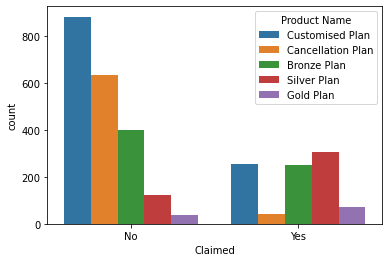

In [15]:
sns.countplot(x='Claimed',hue='Product Name', data=dm_df);

<b>Not Claimed Status:</b> 'Customised Plan' followed by 'Cancellation Plan' has contributed more to Not Claimed Status.  

<b>Claimed Status:</b> However 'Silver Plan' is the category that has Claimed the most followed by 'Bronze' and 'Customized Plan'

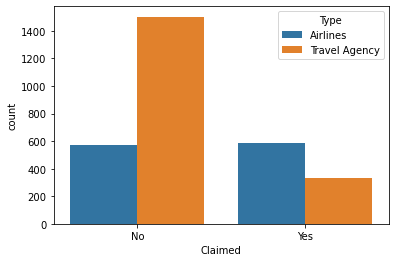

In [16]:
sns.countplot(x='Claimed',hue='Type', data=dm_df);

Airlines contribute proportionately higher Claims compared to overall Sales. Travel Agency type has Claimed lesser proportionately, though overall sales is higher among 'Travel Agency'.

#### Checking for Object Data types

In [17]:
dm_df[dm_df.dtypes[(dm_df.dtypes=='object')|(dm_df.dtypes=='bool')].index].head()

,Agency_Code,Type,Claimed,Channel,Product Name,Destination
0,C2B,Airlines,No,Online,Customised Plan,ASIA
1,EPX,Travel Agency,No,Online,Customised Plan,ASIA
2,CWT,Travel Agency,No,Online,Customised Plan,Americas
3,EPX,Travel Agency,No,Online,Cancellation Plan,ASIA
4,JZI,Airlines,No,Online,Bronze Plan,ASIA


In [18]:
dm_df.dtypes.value_counts()

object     6
float64    2
int64      2
dtype: int64

There are 6 'object' data types that has to be converted to categorical class to process further using Data Encoding.

In [30]:
dm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.002667,134.052619,1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


Note: There's an anomaly in Duration variable, which shows minimum value in negative. This is garbage and needs clean up either by replacing or removing. Let's replace this value by +1 using replace function.

In [31]:
dm_df.Duration.replace(-1,1,inplace=True)

In [32]:
dm_df.Duration.replace(0,26.50,inplace=True)

There was One recored with negative value and 7 values with 0 in 'Duration' variable and we have repaced with the positive value, assuming it's a typo.

In [33]:
dm_df.Duration.head()

0     7
1    34
2     3
3     4
4    53
Name: Duration, dtype: int64

#### Data Encoding

In [21]:
for feature in dm_df[['Agency_Code','Type','Claimed','Channel','Product Name','Destination']]:
    if dm_df[feature].dtype == 'object':
        dm_df[feature] = pd.Categorical(dm_df[feature]).codes 

In [22]:
dm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [23]:
dups = dm_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
dm_df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,0,0,1,15.0,1,27,60.0,0,0
329,36,2,1,0,0.0,1,5,20.0,2,0
407,36,2,1,0,0.0,1,11,19.0,1,0
411,35,2,1,0,0.0,1,2,20.0,2,0
422,36,2,1,0,0.0,1,5,20.0,2,0
...,...,...,...,...,...,...,...,...,...,...
2940,36,2,1,0,0.0,1,8,10.0,1,0
2947,36,2,1,0,0.0,1,10,28.0,2,0
2952,36,2,1,0,0.0,1,2,10.0,1,0
2962,36,2,1,0,0.0,1,4,20.0,2,0


5% of records are showing as duplicate records however when we see the table above, it maynot be duplicates as the Sales & Duration observations are different. Therefore we do not remove these records for further analysis.

#### Checking outliers

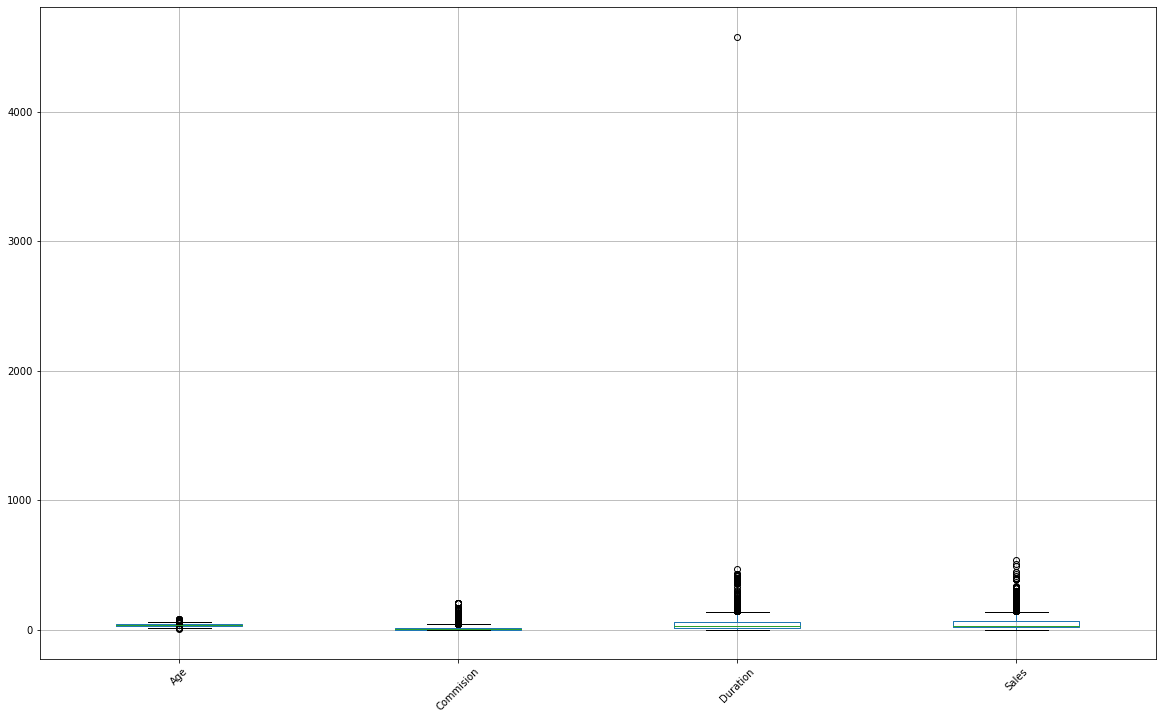

In [24]:
continuous=dm_df.dtypes[(dm_df.dtypes=='int64')|(dm_df.dtypes=='float64')].index
dm_df_plot=dm_df[continuous]

dm_df_plot.boxplot(figsize=(20,12), rot=45);

There are outliers across the numerical variables. We need not treat outliers for CART and Random Forest Models as they are not affected by outliers. However when we build the ANN Model, we need to treat outliers before building.

#### Plotting the Correlation Heatmap to check for multi-collinearity

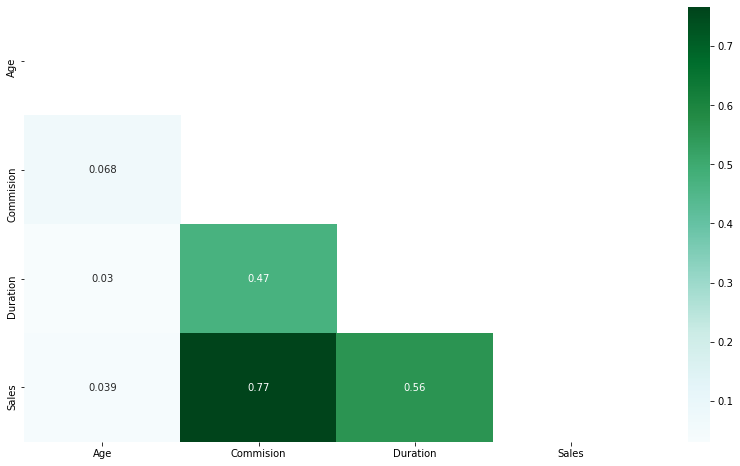

In [25]:
corr = idm_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True, mask=mask,cmap='BuGn');

Commision vs. Sales has got highest positive correlation of 0.77 which is the way Sales function operates (Higher Commision induces higher Sales)

<Figure size 1080x1080 with 0 Axes>

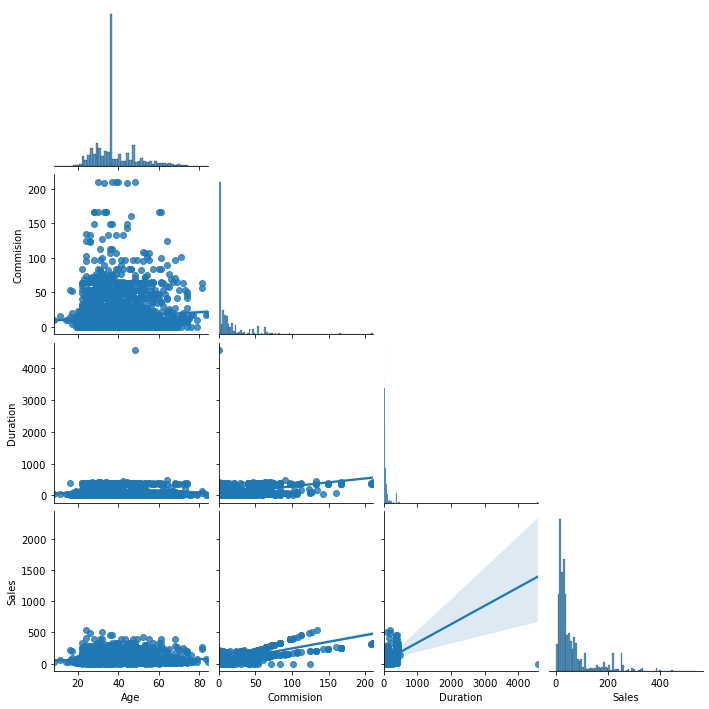

In [26]:
plt.figure(figsize=(15,15))
sns.pairplot(idm_df, corner=True, kind='reg');

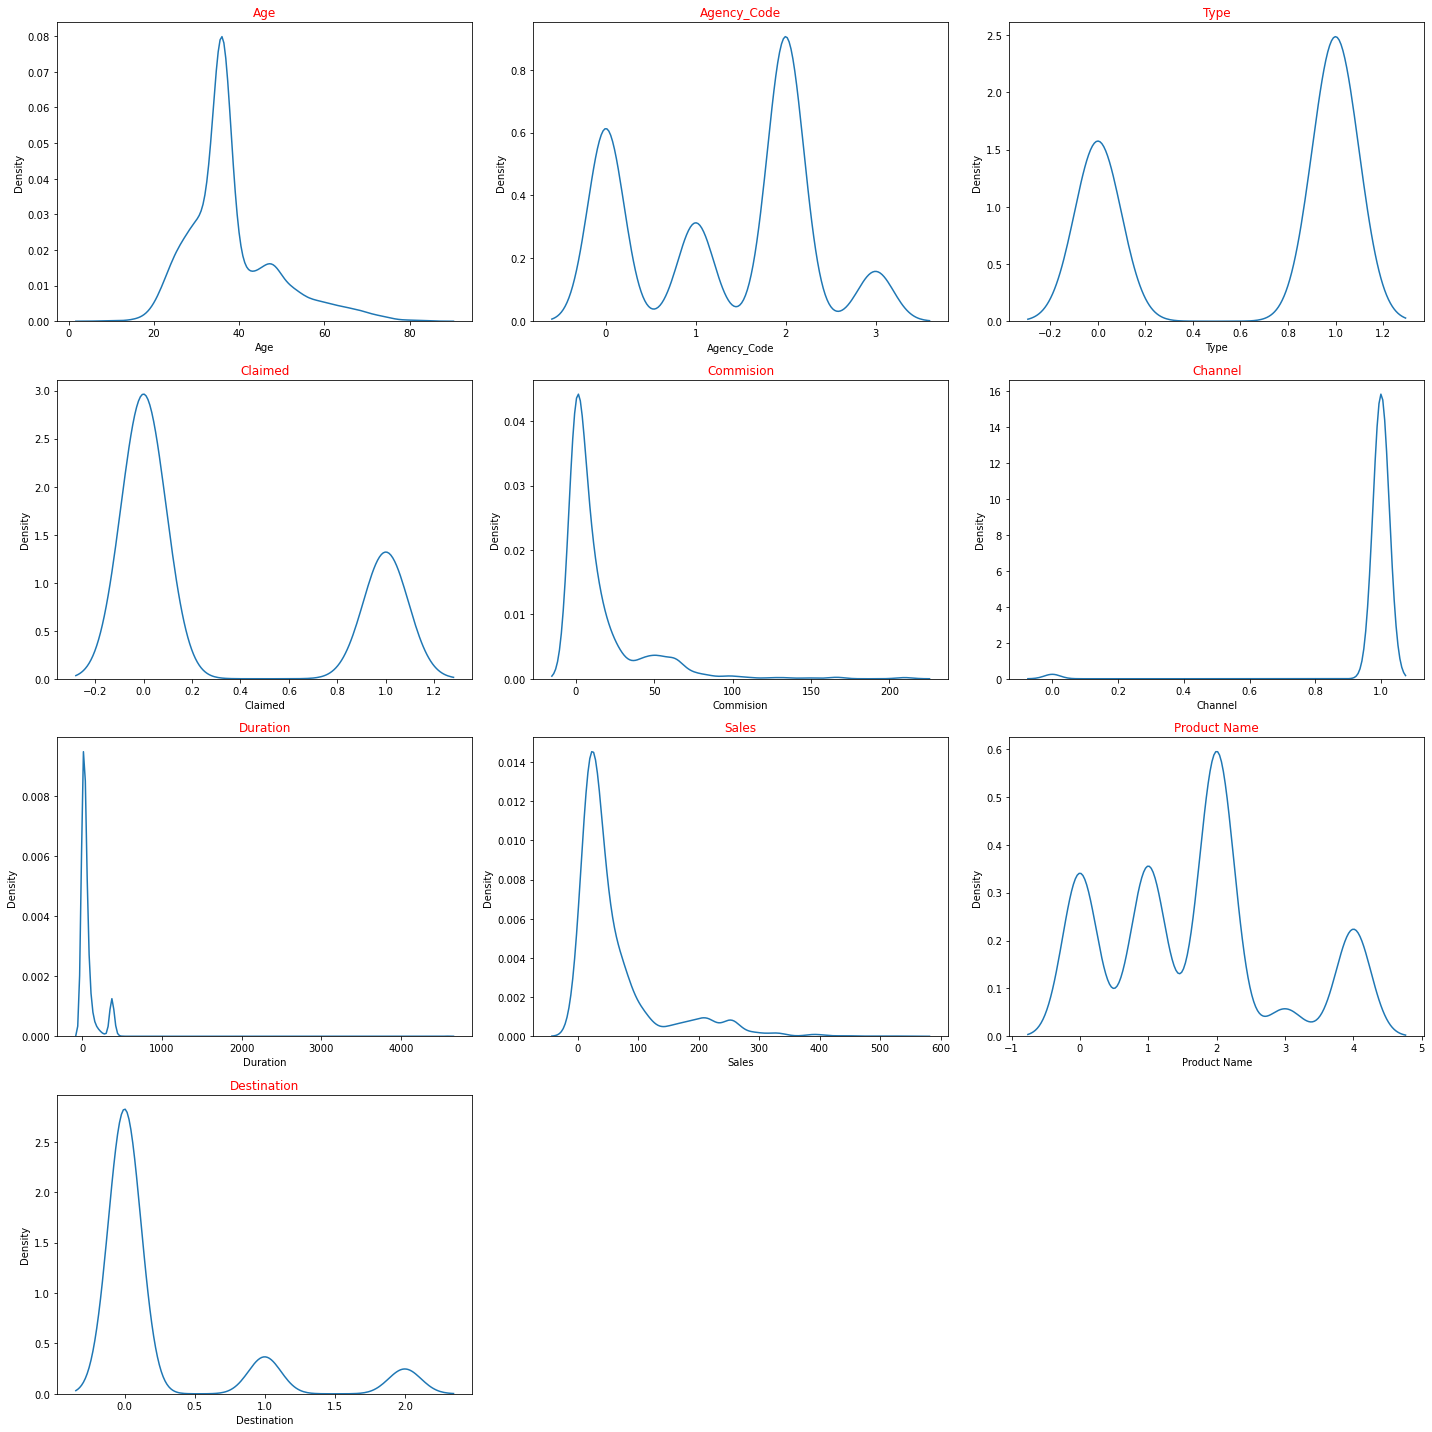

In [27]:
data_plot=dm_df
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,3,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=False)
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()
plt.show()

#### Before we build the ANN Model, the dataset should be treated for outliers and Scaled

##### Treating Outliers using IQR value replacement

In [28]:
dmO_df = idm_df.copy()

In [29]:
dmO_df.shape

(3000, 10)

In [30]:
dmO_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [31]:
dmO_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


#### Data Encoding

In [32]:
for feature in dmO_df[['Agency_Code','Type','Claimed','Channel','Product Name','Destination']]:
    if dmO_df[feature].dtype == 'object':
        dmO_df[feature] = pd.Categorical(dmO_df[feature]).codes 

In [33]:
dmO_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [34]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [35]:
for feature in dmO_df[['Age', 'Commision', 'Duration', 'Sales']]: 
    lr,ur=treat_outlier(dmO_df[feature])
    dmO_df[feature]=np.where(dmO_df[feature]>ur,ur,dmO_df[feature])
    dmO_df[feature]=np.where(dmO_df[feature]<lr,lr,dmO_df[feature])

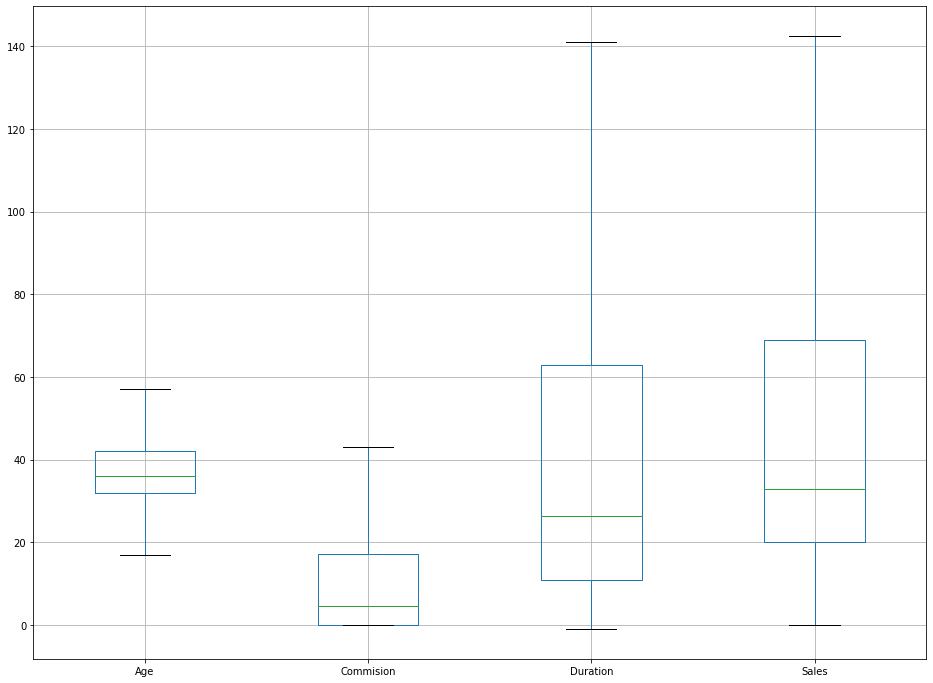

In [36]:
continuous=dmO_df.dtypes[(dmO_df.dtypes=='int64')|(dmO_df.dtypes=='float64')].index
dmO_df_plot=dmO_df[continuous]

dmO_df_plot.boxplot(figsize=(16,12), rot=0);

#### Feature Scaling

Scaling is important while performing Neural Network model as the non_scaled values of higher magnitude can impact the weights and bias. This will result in wrong output.

In [37]:
sc=StandardScaler()

### <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#FF0000;">2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Splitting the data into Train and Test set for Decision Tree Model

In [38]:
dtcm_df = dm_df.copy()

In [39]:
#Extract x and y
dtc_X = dtcm_df.drop('Claimed', axis=1)
dtc_y = dtcm_df.pop('Claimed')


In [40]:
dtc_X_train,dtc_X_test,dtc_y_train,dtc_y_test = train_test_split(dtc_X, dtc_y, test_size = 0.30, random_state = 0)

#### Building a Decision Tree Classifier Model and fit it on the Training Set

In [41]:
dtc = DecisionTreeClassifier(criterion='gini',random_state=0)

In [42]:
dtc.fit(dtc_X_train,dtc_y_train)

DecisionTreeClassifier(random_state=0)

#### Checking the dimensions of the training and test data¶

In [43]:
print('dtc_X_train',dtc_X_train.shape)
print('dtc_X_test',dtc_X_test.shape)
print('dtc_y_train',dtc_y_train.shape)
print('dtc_y_test',dtc_y_test.shape)

dtc_X_train (2100, 9)
dtc_X_test (900, 9)
dtc_y_train (2100,)
dtc_y_test (900,)


#### Hyperparameter tuning using GridSearch

In [44]:
dtc_param_grid = {
    'criterion':['gini'],
    'max_depth': [2,3,6],
    'min_samples_leaf': [3,6,9],
    'min_samples_split': [30,60,90],
}

dtc = DecisionTreeClassifier(random_state=0)

dtc_grid_search = GridSearchCV(estimator = dtc, param_grid = dtc_param_grid, cv = 10)

In [45]:
dtc_grid_search.fit(dtc_X_train, dtc_y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 6],
                         'min_samples_leaf': [3, 6, 9],
                         'min_samples_split': [30, 60, 90]})

In [46]:
dtc_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 6,
 'min_samples_split': 30}

In [47]:
dtc_best_grid = dtc_grid_search.best_estimator_

In [48]:
dtc_best_grid

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6, min_samples_split=30,
                       random_state=0)

#### Generating the Tree

In [49]:
dtc_train_char_label = ['No', 'Yes']
ins_Tree_File = open('ins_Tree_File.dot','w')
dot_data = tree.export_graphviz(dtc_best_grid, 
                                out_file=ins_Tree_File, 
                                feature_names = list(dtc_X_train), 
                                class_names = list(dtc_train_char_label))

ins_Tree_File.close()



#### Regularising the tree

In [50]:
dtc_train_char_label = ['No', 'Yes']
ins_Tree_regularized = open('ins_Tree_regularized.dot','w')
dot_data = tree.export_graphviz(dtc_best_grid, 
                                out_file = ins_Tree_regularized, 
                                feature_names = list(dtc_X_train), 
                                class_names = list(dtc_train_char_label))

ins_Tree_regularized.close()




In [51]:
print (pd.DataFrame(dtc_best_grid.feature_importances_, columns = ["Imp"], index = dtc_X_train.columns).sort_values('Imp',ascending=False))




                   Imp
Agency_Code   0.652807
Sales         0.279064
Product Name  0.061492
Commision     0.006637
Age           0.000000
Type          0.000000
Channel       0.000000
Duration      0.000000
Destination   0.000000


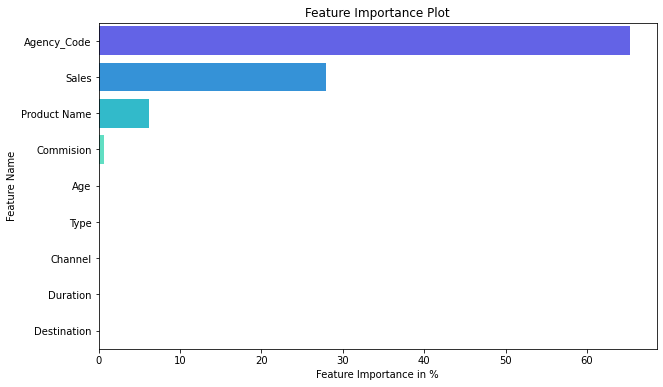

In [52]:
x=pd.DataFrame(dtc_best_grid.feature_importances_*100,index=dtc_X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Splitting the data into Train and Test set for Random Forest Model

In [53]:
rm_df = dm_df.copy()

In [54]:
#Extract x and y
rfc_X = rm_df.drop('Claimed', axis=1)
rfc_y = rm_df.pop('Claimed')


In [55]:
rfc_X_train,rfc_X_test,rfc_y_train,rfc_y_test = train_test_split(rfc_X, rfc_y, test_size = 0.30, random_state = 0)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea;">Building a Random Forest Classifier Model and fit it on the Training Set

In [56]:
random_state=[0,10,21,42]
for i in random_state:
    rf=RandomForestClassifier(random_state=i,oob_score=True)
    rf.fit(rfc_X_train,rfc_y_train)
    print(rf.oob_score_)



0.7409523809523809
0.7371428571428571
0.7461904761904762
0.741904761904762


In [57]:
rfc = RandomForestClassifier(n_estimators = 100,max_features=6,random_state=21)
rfc = rfc.fit(rfc_X_train, rfc_y_train)

In [58]:
rfc_param_grid = {
    'max_depth': [5,10,15],
    'max_features': [3,5,6],
    'min_samples_leaf': [3,6,9,27],
    'min_samples_split': [63,108,162],
    'n_estimators': [20,30,60]
}

rfc = RandomForestClassifier(random_state=21)

rfc_grid_search = GridSearchCV(estimator = rfc, param_grid = rfc_param_grid, cv = 10)

In [59]:
rfc_grid_search.fit(rfc_X_train, rfc_y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=21),
             param_grid={'max_depth': [5, 10, 15], 'max_features': [3, 5, 6],
                         'min_samples_leaf': [3, 6, 9, 27],
                         'min_samples_split': [63, 108, 162],
                         'n_estimators': [20, 30, 60]})

In [60]:
rfc_grid_search.best_params_

{'max_depth': 15,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 63,
 'n_estimators': 30}

In [61]:
rfc_best_grid = rfc_grid_search.best_estimator_

In [62]:
rfc_best_grid

RandomForestClassifier(max_depth=15, max_features=5, min_samples_leaf=3,
                       min_samples_split=63, n_estimators=30, random_state=21)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Splitting the data into Train and Test set for ANN Model

In [63]:
ann_df = dmO_df.copy()

In [64]:
#Extract x and y
X = dmO_df.drop('Claimed', axis=1)
y = dmO_df.pop('Claimed')


In [65]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [66]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [67]:
ann=MLPClassifier(hidden_layer_sizes=(100,50),solver='adam',random_state=0,max_iter=5000, tol=0.01)

In [68]:
ann.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=5000, random_state=0,
              tol=0.01)

#### Model Tuning through Grid Search

In [69]:
ann_param_grid = {
    'hidden_layer_sizes': [10,30,50],
    'max_iter': [5000,3000,6000],
    'solver': ['sgd','adam'],
    'tol': [0.01,0.001],
}

ann = MLPClassifier(random_state=0)

ann_grid_search = GridSearchCV(estimator = ann, param_grid = ann_param_grid, cv = 10)

In [70]:
ann_grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=0),
             param_grid={'hidden_layer_sizes': [10, 30, 50],
                         'max_iter': [5000, 3000, 6000],
                         'solver': ['sgd', 'adam'], 'tol': [0.01, 0.001]})

In [71]:
ann_grid_search.best_params_

{'hidden_layer_sizes': 50, 'max_iter': 5000, 'solver': 'adam', 'tol': 0.001}

In [72]:
ann_best_grid = ann_grid_search.best_estimator_

In [73]:
ann_best_grid

MLPClassifier(hidden_layer_sizes=50, max_iter=5000, random_state=0, tol=0.001)

### <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#FF0000;">2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Predictions on The training Set for Decision Tree Model

In [74]:
dtc_ytrain_predict = dtc_best_grid.predict(dtc_X_train)
dtc_ytest_predict = dtc_best_grid.predict(dtc_X_test)

In [75]:
dtc_ytest_predict
dtc_ytest_predict_proba=dtc_best_grid.predict_proba(dtc_X_test)
dtc_ytest_predict_proba
pd.DataFrame(dtc_ytest_predict_proba).head()

,0,1
0,0.878274,0.121726
1,0.240175,0.759825
2,0.878274,0.121726
3,0.445070,0.554930
4,0.749571,0.250429


#### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea;">Checking the Metrics for Predictions on the Training set by Descision Tree Classifier
[Accuracy Score, Classification Report, Confusion Matrix]

Training Set

Accuracy for DecisionTreeClassifier model is 
 0.7795238095238095


Classification report for DecisionTreeClassifier model is 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1464
           1       0.64      0.62      0.63       636

    accuracy                           0.78      2100
   macro avg       0.74      0.74      0.74      2100
weighted avg       0.78      0.78      0.78      2100



Confusion Matrix for DecisionTreeClassifier model is


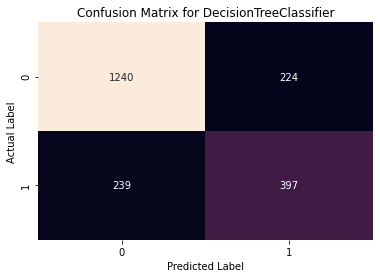

In [76]:
models_names={dtc:'DecisionTreeClassifier'}

print('Training Set\n')
print('Accuracy for {} model is'.format(models_names[dtc]),'\n',accuracy_score(dtc_y_train,dtc_ytrain_predict))
print('\n')
print('Classification report for {} model is'.format(models_names[dtc]),'\n',classification_report(dtc_y_train,dtc_ytrain_predict))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[dtc]))
sns.heatmap(confusion_matrix(dtc_y_train,dtc_ytrain_predict),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[dtc]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [77]:
cart_metrics=classification_report(dtc_y_train, dtc_ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][0],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.64
cart_train_recall  0.62
cart_train_f1  0.63


In [78]:
cart_train_acc=dtc_best_grid.score(dtc_X_train,dtc_y_train)
cart_train_acc

0.7795238095238095

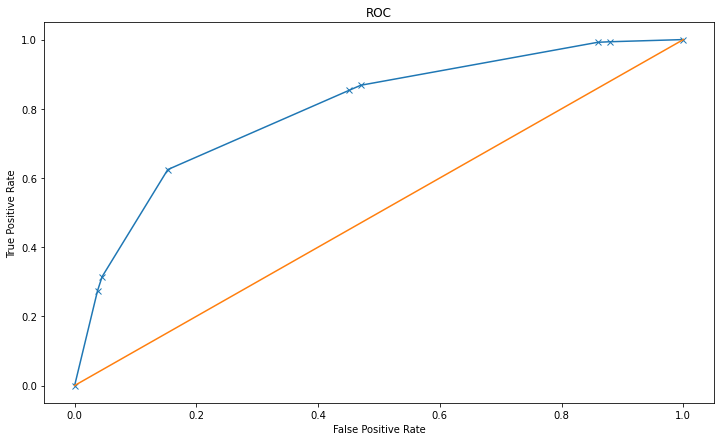

Area under Curve for Decision Tree Training Set is:-  0.7356041859985566


In [79]:
cart_train_fpr, cart_train_tpr,_=roc_curve(dtc_y_train,dtc_best_grid.predict_proba(dtc_X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(cart_train_fpr,cart_train_tpr, marker='x', label='Decision Tree')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
cart_train_auc=roc_auc_score(dtc_y_train,dtc_best_grid.predict(dtc_X_train))
plt.show()
print('Area under Curve for Decision Tree Training Set is:- ', cart_train_auc)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea;">Checking the Metrics for Predictions on the Testing set by Descision Tree Classifier
[Accuracy Score, Classification Report, Confusion Matrix]

Testing Set

Accuracy for DecisionTreeClassifier model is 
 0.7922222222222223


Classification report for DecisionTreeClassifier model is 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       612
           1       0.70      0.62      0.66       288

    accuracy                           0.79       900
   macro avg       0.76      0.75      0.75       900
weighted avg       0.79      0.79      0.79       900



Confusion Matrix for DecisionTreeClassifier model is


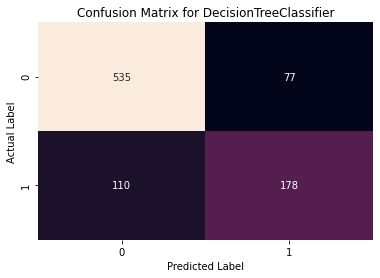

In [80]:
models_names={dtc:'DecisionTreeClassifier'}

print('Testing Set\n')
print('Accuracy for {} model is'.format(models_names[dtc]),'\n',accuracy_score(dtc_y_test,dtc_ytest_predict))
print('\n')
print('Classification report for {} model is'.format(models_names[dtc]),'\n',classification_report(dtc_y_test,dtc_ytest_predict))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[dtc]))
sns.heatmap(confusion_matrix(dtc_y_test,dtc_ytest_predict),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[dtc]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [81]:
cart_metrics=classification_report(dtc_y_test, dtc_ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.7
cart_test_recall  0.62
cart_test_f1  0.66


In [82]:
cart_test_acc=dtc_best_grid.score(dtc_X_test,dtc_y_test)
cart_test_acc

0.7922222222222223

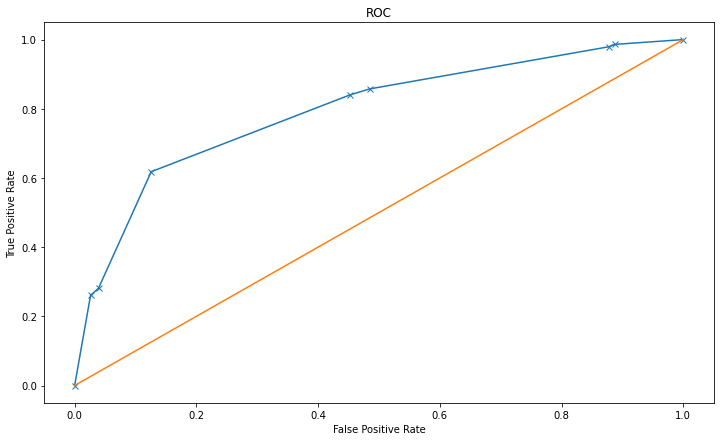

Area under Curve for Testing Set of Decision Tree is:-  0.7461192810457516


In [83]:
cart_test_fpr, cart_test_tpr,_=roc_curve(dtc_y_test,dtc_best_grid.predict_proba(dtc_X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(cart_test_fpr,cart_test_tpr, marker='x', label='Decision Tree')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
cart_test_auc=roc_auc_score(dtc_y_test,dtc_best_grid.predict(dtc_X_test))
plt.show()
print('Area under Curve for Testing Set of Decision Tree is:- ', cart_test_auc)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Conclusion on CART Model

<b>Train Data:</b>  
    
AUC: 73.56%  
Accuracy: 77.95%  
Sensitivity: 62%  
Precision: 64%  
f1-Score: 63%  
best_grid score:77.95%  

<b>Test Data:</b>  
    
AUC: 74.61%  
Accuracy:79.22%  
Sensitivity: 62%  
Precision: 70%  
f1-Score: 66%  
best_grid score:79.22%  
    
<b>Training and Test set results are almost similar.</b>     

<b>Agency Code</b> is the most important variable for predicting insurance Claimed.  

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Predictions on The training Set by Random Forest Classifier


In [84]:
rfc_ytrain_predict = rfc_best_grid.predict(rfc_X_train)
rfc_ytest_predict = rfc_best_grid.predict(rfc_X_test)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea;"> Check the Metrics for Predictions on the Training set for Random Forest Classifier
[Accuracy Score, Classification Report, Confusion Matrix]

Training Set

Accuracy for RandomForestClassifier model is 
 0.81


Classification report for RandomForestClassifier model is 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1464
           1       0.72      0.61      0.66       636

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.81      0.81      2100



Confusion Matrix for RandomForestClassifier model is


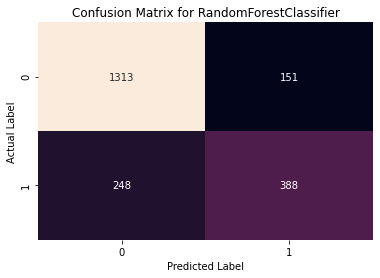

In [85]:
models_names={dtc:'DecisionTreeClassifier',rfc:'RandomForestClassifier'}

print('Training Set\n')
print('Accuracy for {} model is'.format(models_names[rfc]),'\n',accuracy_score(rfc_y_train,rfc_ytrain_predict))
print('\n')
print('Classification report for {} model is'.format(models_names[rfc]),'\n',classification_report(rfc_y_train,rfc_ytrain_predict))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[rfc]))
sns.heatmap(confusion_matrix(rfc_y_train,rfc_ytrain_predict),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[rfc]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [86]:
rfc_metrics=classification_report(rfc_y_train, rfc_ytrain_predict,output_dict=True)
df=pd.DataFrame(rfc_metrics).transpose()
rfc_train_precision=round(df.loc["1"][0],2)
rfc_train_recall=round(df.loc["1"][1],2)
rfc_train_f1=round(df.loc["1"][2],2)
print ('rfc_train_precision ',rfc_train_precision)
print ('rfc_train_recall ',rfc_train_recall)
print ('rfc_train_f1 ',rfc_train_f1)

rfc_train_precision  0.72
rfc_train_recall  0.61
rfc_train_f1  0.66


In [87]:
rfc_train_acc=rfc_best_grid.score(rfc_X_train,rfc_y_train)
rfc_train_acc

0.81

Area under Curve for Random Forest Training Set is:-  0.7534604082895144


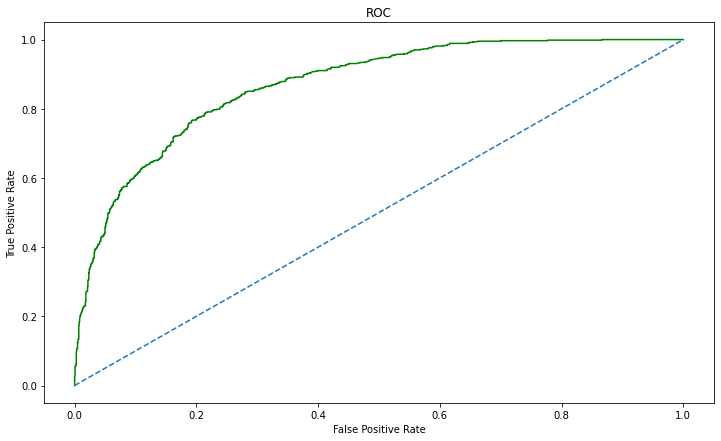

In [88]:
rfc_train_fpr, rfc_train_tpr,_=roc_curve(rfc_y_train,rfc_best_grid.predict_proba(rfc_X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rfc_train_fpr,rfc_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rfc_train_auc=roc_auc_score(rfc_y_train,rfc_best_grid.predict(rfc_X_train))
print('Area under Curve for Random Forest Training Set is:- ', rfc_train_auc)

In [89]:
print (pd.DataFrame(rfc_best_grid.feature_importances_, columns = ["Imp"], index = rfc_X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Product Name  0.245503
Agency_Code   0.240009
Sales         0.200818
Commision     0.119232
Duration      0.096339
Age           0.065973
Type          0.014666
Destination   0.013100
Channel       0.004361


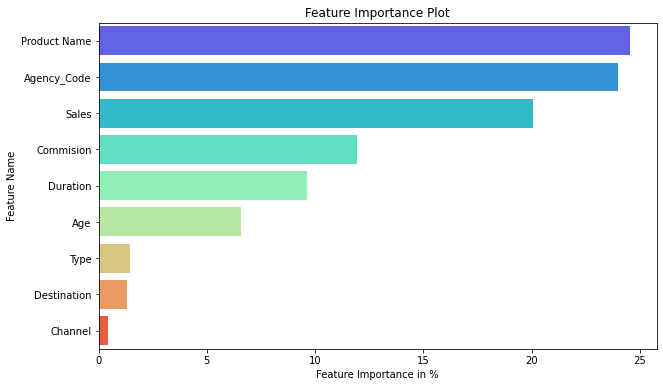

In [90]:
x=pd.DataFrame(rfc_best_grid.feature_importances_*100,index=rfc_X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;"> Random Forest fit on Testing Data

Testing Set

Accuracy for RandomForestClassifier model is 
 0.8022222222222222


Classification report for RandomForestClassifier model is 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       612
           1       0.74      0.59      0.66       288

    accuracy                           0.80       900
   macro avg       0.78      0.75      0.76       900
weighted avg       0.80      0.80      0.80       900



Confusion Matrix for RandomForestClassifier model is


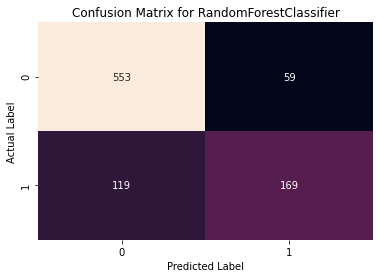

In [91]:
models_names={dtc:'DecisionTreeClassifier',rfc:'RandomForestClassifier'}

print('Testing Set\n')
print('Accuracy for {} model is'.format(models_names[rfc]),'\n',accuracy_score(rfc_y_test,rfc_ytest_predict))
print('\n')
print('Classification report for {} model is'.format(models_names[rfc]),'\n',classification_report(rfc_y_test,rfc_ytest_predict))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[rfc]))
sns.heatmap(confusion_matrix(rfc_y_test,rfc_ytest_predict),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[rfc]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [92]:
rfc_metrics=classification_report(rfc_y_test, rfc_ytest_predict,output_dict=True)
df=pd.DataFrame(rfc_metrics).transpose()
rfc_test_precision=round(df.loc["1"][0],2)
rfc_test_recall=round(df.loc["1"][1],2)
rfc_test_f1=round(df.loc["1"][2],2)
print ('rfc_test_precision ',rfc_test_precision)
print ('rfc_test_recall ',rfc_test_recall)
print ('rfc_test_f1 ',rfc_test_f1)

rfc_test_precision  0.74
rfc_test_recall  0.59
rfc_test_f1  0.66


In [93]:
rfc_test_acc=rfc_best_grid.score(rfc_X_test,rfc_y_test)
rfc_test_acc

0.8022222222222222

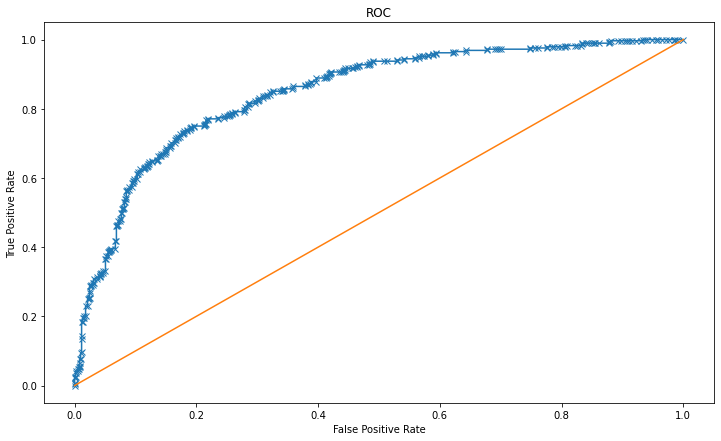

Area under Curve for Random Forest Testing Set is:-  0.7452001633986928


In [94]:
rfc_test_fpr, rfc_test_tpr,_=roc_curve(rfc_y_test,rfc_best_grid.predict_proba(rfc_X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rfc_test_fpr,rfc_test_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rfc_test_auc=roc_auc_score(rfc_y_test,rfc_best_grid.predict(rfc_X_test))
plt.show()
print('Area under Curve for Random Forest Testing Set is:- ',rfc_test_auc)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea;">Conclusion on Random Forest Model

<b>Train Data:</b>  
    
AUC: 75.35%  
Accuracy: 81%  
Sensitivity: 61%  
Precision: 72%  
f1-Score: 66%  
best_grid score:81%  

<b>Test Data:</b>  
    
AUC: 74.52%  
Accuracy: 80.22%  
Sensitivity: 59%  
Precision: 74%  
f1-Score: 66%  
best_grid score:80.22%  
    
<b>Training and Test set results are almost similar.</b>     

<b>Product Name</b> is the most important variable CLOSELY followed by <b>Agency Code</b>for predicting insurance Claimed.  

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;"> Building an ANN Model and fit it on the Training Set

#### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea;">Predictions on The training Set for MLP Classifier (ANN)

In [95]:
ann_ytrain_predict = ann_best_grid.predict(X_train)
ann_ytest_predict = ann_best_grid.predict(X_test)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea;">Checking the Metrics for Predictions on the Training set for MLP Classifier (ANN)
[Accuracy Score, Classification Report, Confusion Matrix]

Training Set

Accuracy for ANN model is 
 0.7742857142857142


Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85      1464
           1       0.68      0.49      0.57       636

    accuracy                           0.77      2100
   macro avg       0.74      0.69      0.71      2100
weighted avg       0.76      0.77      0.76      2100



Confusion Matrix for ANN model is


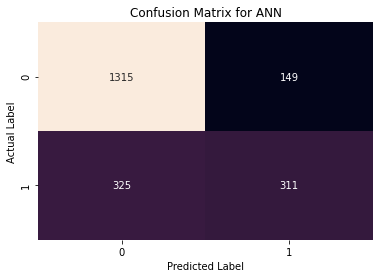

In [96]:
models_names={dtc:'DecisionTreeClassifier',rfc:'RandomForestClassifier',ann:'ANN'}

print('Training Set\n')
print('Accuracy for {} model is'.format(models_names[ann]),'\n',accuracy_score(y_train,ann_ytrain_predict))
print('\n')
print('Classification report for {} model is'.format(models_names[ann]),'\n',classification_report(y_train,ann_ytrain_predict))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[ann]))
sns.heatmap(confusion_matrix(y_train,ann_ytrain_predict),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[ann]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [97]:
ann_metrics=classification_report(y_train, ann_ytrain_predict,output_dict=True)
df=pd.DataFrame(ann_metrics).transpose()
ann_train_precision=round(df.loc["1"][0],2)
ann_train_recall=round(df.loc["1"][1],2)
ann_train_f1=round(df.loc["1"][2],2)
print ('ann_train_precision ',ann_train_precision)
print ('ann_train_recall ',ann_train_recall)
print ('ann_train_f1 ',ann_train_f1)

ann_train_precision  0.68
ann_train_recall  0.49
ann_train_f1  0.57


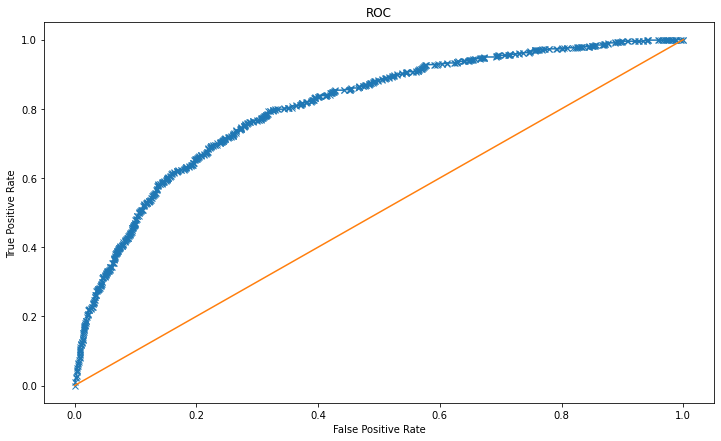

Area under Curve for Training Set of ANN is:-  0.6936088772038355


In [98]:

ann_train_fpr, ann_train_tpr,_=roc_curve(y_train,ann_best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(ann_train_fpr,ann_train_tpr, marker='x', label='ANN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
ann_train_auc=roc_auc_score(y_train,ann_best_grid.predict(X_train))
plt.show()
print('Area under Curve for Training Set of ANN is:- ', ann_train_auc)

In [99]:
ann_train_acc=ann_best_grid.score(X_train,y_train)
ann_train_acc

0.7742857142857142

#### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea;">Checking the Metrics for Predictions on the Testing set for MLP Classifier (ANN)
[Accuracy Score, Classification Report, Confusion Matrix]

Testing Set

Accuracy for ANN model is 
 0.7722222222222223


Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.79      0.91      0.84       612
           1       0.72      0.48      0.57       288

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.71       900
weighted avg       0.76      0.77      0.76       900



Confusion Matrix for ANN model is


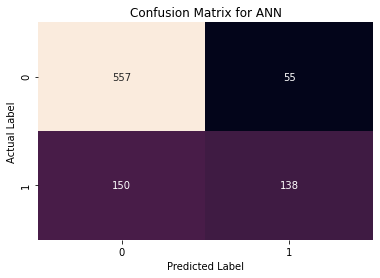

In [100]:
models_names={dtc:'DecisionTreeClassifier',rfc:'RandomForestClassifier',ann:'ANN'}

print('Testing Set\n')
print('Accuracy for {} model is'.format(models_names[ann]),'\n',accuracy_score(y_test,ann_ytest_predict))
print('\n')
print('Classification report for {} model is'.format(models_names[ann]),'\n',classification_report(y_test,ann_ytest_predict))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[ann]))
sns.heatmap(confusion_matrix(y_test,ann_ytest_predict),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[ann]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [101]:
ann_metrics=classification_report(y_test, ann_ytest_predict,output_dict=True)
df=pd.DataFrame(ann_metrics).transpose()
ann_test_precision=round(df.loc["1"][0],2)
ann_test_recall=round(df.loc["1"][1],2)
ann_test_f1=round(df.loc["1"][2],2)
print ('ann_test_precision ',ann_test_precision)
print ('ann_test_recall ',ann_test_recall)
print ('ann_test_f1 ',ann_test_f1)

ann_test_precision  0.72
ann_test_recall  0.48
ann_test_f1  0.57


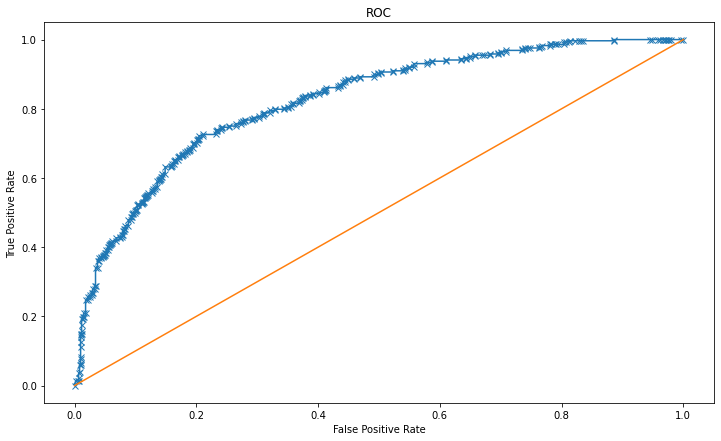

Area under Curve for Testing Set of ANN is:-  0.6946486928104576


In [102]:

ann_test_fpr, ann_test_tpr,_=roc_curve(y_test,ann_best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(ann_test_fpr,ann_test_tpr, marker='x', label='ANN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
ann_test_auc=roc_auc_score(y_test,ann_best_grid.predict(X_test))
plt.show()
print('Area under Curve for Testing Set of ANN is:- ', ann_test_auc)


In [103]:
ann_test_acc=ann_best_grid.score(X_test,y_test)
ann_test_acc

0.7722222222222223

#### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea;">Conclusion on MLP Classifier Model (ANN)

<b>Train Data:</b>
    
AUC: 69.36%  
Accuracy: 77.43%  
Sensitivity: 49%  
Precision: 68%  
f1-Score: 57%  
best_grid score: 77.43%  

<b>Test Data:</b>  
    
AUC: 69.46%  
Accuracy: 77.22%  
Sensitivity: 48%  
Precision: 72%  
f1-Score: 59%  
best_grid score:77.22%  
    
<b>Training and Test set results are similar.</b>   

### <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#FF0000;">2.4 Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Comparison of the performance metrics from the 3 models

In [104]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rfc_train_acc,rfc_train_auc,rfc_train_recall,rfc_train_precision,rfc_train_f1],
        'Random Forest Test':[rfc_test_acc,rfc_test_auc,rfc_test_recall,rfc_test_precision,rfc_test_f1],
       'Neural Network Train':[ann_train_acc,ann_train_auc,ann_train_recall,ann_train_precision,ann_train_f1],
        'Neural Network Test':[ann_test_acc,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.79,0.81,0.80,0.77,0.77
AUC,0.74,0.75,0.75,0.75,0.69,0.69
Recall,0.62,0.62,0.61,0.59,0.49,0.48
Precision,0.64,0.70,0.72,0.74,0.68,0.72
F1 Score,0.63,0.66,0.66,0.66,0.57,0.57


#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">ROC Curve for the 3 models on the Training data

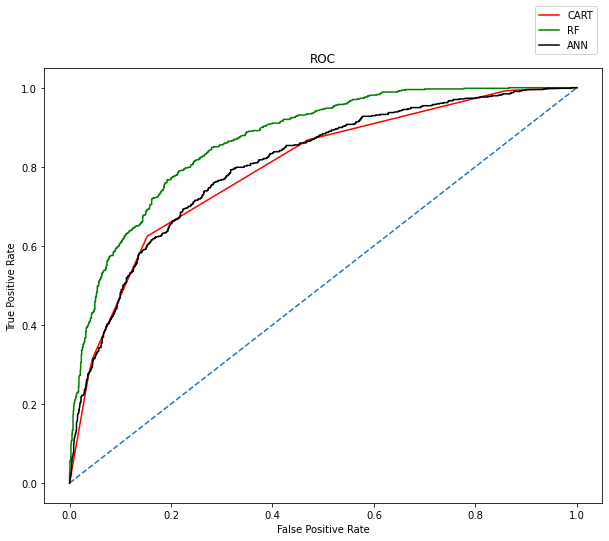

In [105]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rfc_train_fpr,rfc_train_tpr,color='green',label="RF")
plt.plot(ann_train_fpr,ann_train_tpr,color='black',label="ANN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">ROC Curve for the 3 models on the Test data

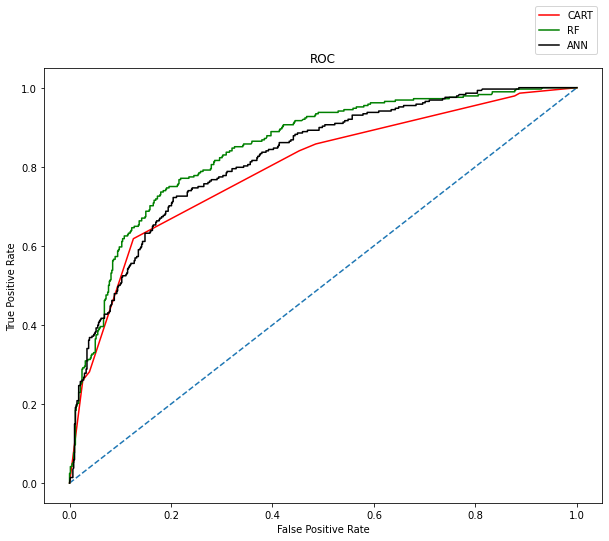

In [106]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rfc_test_fpr,rfc_test_tpr,color='green',label="RF")
plt.plot(ann_test_fpr,ann_test_tpr,color='black',label="ANN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#FF0000;">2.5 Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective.

Insights from the dataset:
    
1. The data is well dispersed with 70:30 ratio. Therefore the model building can be done better as there          balance in data.
        Proportion of 0's ('Not Claimed')is:-  69.2 %
        Proportion of 1's ('Claimed') is:-  30.8 %

2. Asia tops the 'Destination' follwed by Americas and Europe and the pattern is same for both 'Claimed' as      well as 'Not Claimed' status.

3. Among the Channels, Calimed vs. Bot Claimed, 
    'Not Claimed' Status:'EPX' channel tops the list in Not Claimed status followed by C2B,CWT,JZI.  
    'Claimed' Status:     However 'C2B' is the Agency that has Claimed more compared to others.
    
4. It's visibly obvious that Online Channel dominates the total sales and the same is visible in both            'Claimed'/'Not Claimed' Status.

5. Claimed status vs. Plan Type:

    'Not Claimed' Status:'Customised Plan' followed by 'Cancellation Plan' has contributed more to                 'Not Claimed' Status.  
    
    'Claimed' Status: However 'Silver Plan' is the category that has Claimed the most followed by 'Bronze' and     'Customized Plan'.
    
6. Airlines contribute proportionately higher Claims compared to overall Sales. Travel Agency type has Claimed    lesser proportionately, though overall sales is higher among 'Travel Agency'.

7. Commision vs. Sales has got highest positive correlation of 0.77 which is the way Sales function operates      (Higher Commision induces higher Sales).

<b>Inferences from Model building:- CART (Decision Tree) Vs. Random Forest Vs. Neural Network (ANN):</b>

    - The Model performance for CART & Random Forest is almost similar and way better than ANN
    
    - CART can be considered as it is a simple to interpret and simplicity quotient is higher,however, when         the dataset grows larger as business grows, then the is better solution - 'Random Forest'.
    
    - Random Forest can be considered the optimized model for this business problem as the AUC,                     Accuracy,Precison and f1 score is better. Though Recall is an important factor where CART scores               better,as mentioned earlier, the nature of Random Forest Model is such that as larger data becomes             available, the model will perform much better than CART. Please Note that Random Forest is an extended         version of CART.
    
    - Considering the futuristic requirement of the organisation's continuous requirement, Random Forest will       be a better solution and optimised model for this business problem.
    
    - When comparing the Train and Test data, the model is best fit with Random Forest though there is a             difference in Train vs. Test AUC score in CART which is not significant to claim that the model is             over-fitting in Train set. However Random Foreast Model performed similr both in Tran as well as Test         data.
    
<u>Recommendations to the management:</u>

- Select the model Random Forest as it has high simplicity quotient, interpretability and highly stable than     other models.

- More records to be added to get the prediction model better optimised and predicted inn future.

- Can include variable customer name/id to understand whether any claims made by customers are unique or         is there any correlation.

- Can include variable 'Reason for Claim' and understand is there any particular reason for which the claim is   made. For eg. Baggage loss or accident or delay/cancellation etc.

- The false negative cases needs deep-dive record-wise by the Customer Relations team to understand whether     they can be potential Claimed status customers in future.

- The variables 'Product Name' & 'Agency Code' has higher variable importances and needs further re-work on     Commisions given to the Agencies based on these high 'Claimed' category. (Note: Sales & Commission had         highest positive correlation - see heat map done earlier).

------------------------------------------------------------------ End of Report -------------------------------------------------------------------------------------